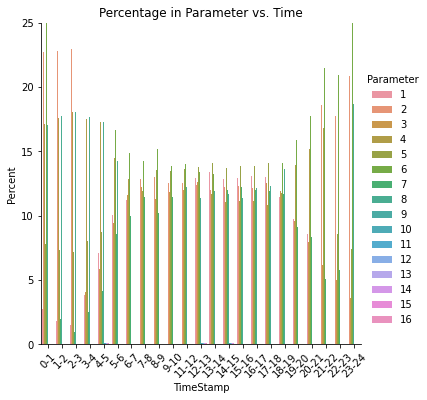

In [28]:
import pandas as pd
import numpy as np
import sklearn as sk
from datetime import datetime, timedelta
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns



#================================================================================================================ 
#Get Columns from Signal Data CSV file
#================================================================================================================

col_list = ["TimeStamp", "DeviceId", "EventId", "Parameter"]
df_spat = pd.read_csv('Signal_events.txt', delimiter = " ")


df_spat["TimeStamp"] = pd.to_datetime(df_spat["TimeStamp"])
time = pd.to_datetime(df_spat["TimeStamp"])
#print (df_spat)

eventid = df_spat['EventId']
parameter = df_spat['Parameter']
new_time = []
for row in range(len(time)):
    
    new_time.append((time[row] - datetime(2021, 1,4)).total_seconds())

#print(new_time)

spat = []

for i in range(len(df_spat)//1000):
    
    spat.append((1000*i, eventid[1000*i], parameter[1000*i]))
    

#line_df = pd.DataFrame(data=spat, columns = ["time", "eventid", "parameter"])
#print(line_df)
            

#lineplot = sns.lineplot(data=line_df, x= "time" , y = "eventid", hue = "parameter" )
#plt.yticks(np.arange(0,100, step =5))
#plt.ylim(0,100)

#plt.xlabel("timestamp")
#plt.ylabel("eventId")


#grouped = df_spat.groupby(["Parameter"], sort = True)

#bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]

#labels = ["00:00-02:59","3:00-5:59", "06:00-8:59","9:00-11:59", "12:00-14:59","15:00-17:59", "18:00-20:59", "21:00-23:59"]

bins = [1,2,3,4,5, 6,7, 8,9,10, 11, 12,13, 14,15, 16, 17, 18,19, 20,21,22,23, 24]

labels = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10", "11-12", "12-13"
         , "13-14", "14-15", "15-16", "16-17", "17-18","18-19", "19-20", "20-21", "21-22", "22-23","23-24"]


df_spat["TimeStamp"] = pd.cut(df_spat.TimeStamp.dt.hour, bins, labels = labels, right=False)

x,y = 'TimeStamp', 'Parameter'

df_y = df_spat.groupby(x)[y].value_counts(normalize = True)
df_y = df_y.mul(100)
df_y = df_y.rename('Percent').reset_index()



#fig, barchart = plt.subplots()

barchart = sns.catplot(x=x, y='Percent', hue=y, kind='bar', data=df_y)
barchart.ax.set_ylim(0,25)
plt.xticks(rotation=45)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

#change_width(barchart, .35)

#plt.figure(figsize=(100,50))

plt.title("Percentage in Parameter vs. Time")

plt.show()

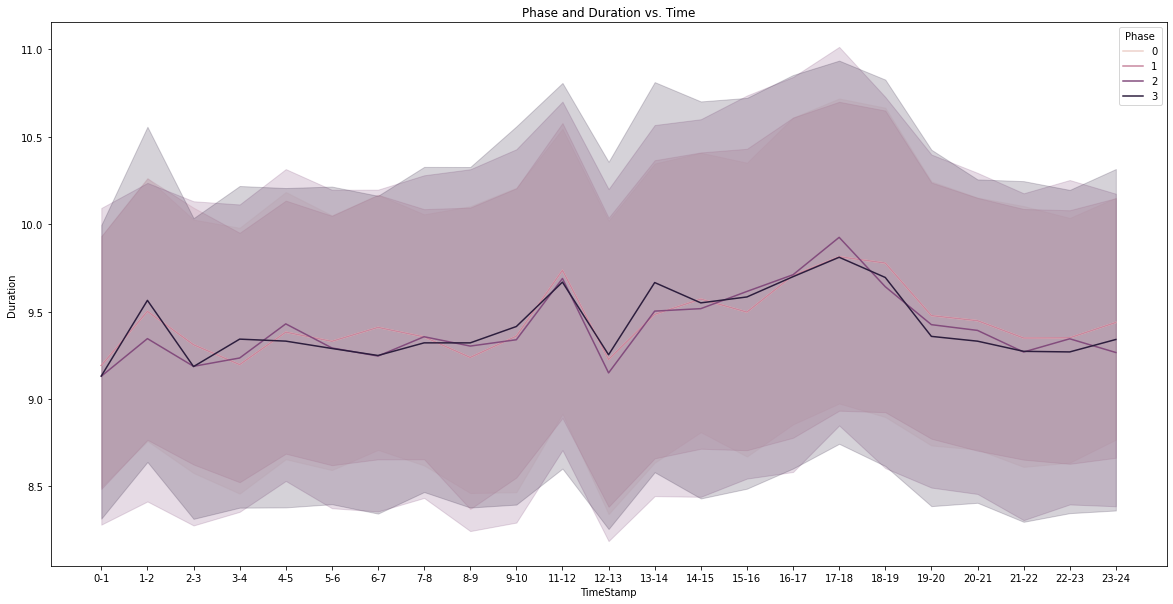

In [51]:
import pandas as pd
import numpy as np
import sklearn as sk
from datetime import datetime, timedelta
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns



#================================================================================================================ 
#Get Columns from SPaT CSV file with Phase, Result, Start, End, Duration
#================================================================================================================

col_list = ['Phase', 'Result', 'Start', 'End', 'Duration']
df_spat = pd.read_csv('format4_sklearn_dataset_with_duration.csv', usecols = col_list)


df_spat["TimeStamp"] = pd.to_datetime(df_spat["Start"])


bins = [1,2,3,4,5, 6,7, 8,9,10, 11, 12,13, 14,15, 16, 17, 18,19, 20,21,22,23, 24]

labels = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10", "11-12", "12-13"
         , "13-14", "14-15", "15-16", "16-17", "17-18","18-19", "19-20", "20-21", "21-22", "22-23","23-24"]

df_spat["TimeStamp"] = pd.cut(df_spat.TimeStamp.dt.hour, bins, labels = labels, right=False)

x,y,z = 'TimeStamp', 'Phase', 'Duration'

#df_spat[z] = max(df_spat[z].value_counts())

#print(df)

plt.figure(figsize=(20,10))

#barchart = sns.catplot(x=x, y=z, hue=y, kind='swarm', data=df_spat)
#barchart.ax.set_ylim(0,100)

plt.title("Phase and Duration vs. Time")


linechart = sns.lineplot(data=df_spat, x="TimeStamp", y= "Duration", hue = "Phase" )

plt.show()

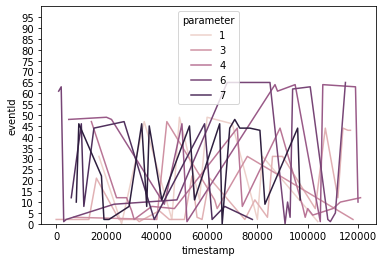

<Figure size 7200x3600 with 0 Axes>

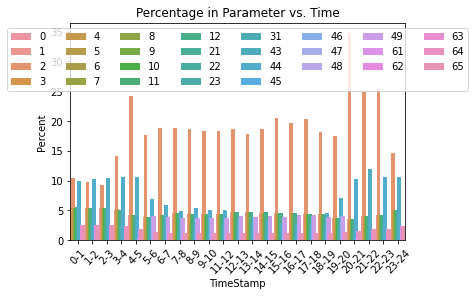

<Figure size 20000x2000 with 0 Axes>

In [125]:
import pandas as pd
import numpy as np
import sklearn as sk
from datetime import datetime, timedelta
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure





#================================================================================================================ 
#Get Columns from Signal Data CSV file
#================================================================================================================

col_list = ["TimeStamp", "DeviceId", "EventId", "Parameter"]
df_spat = pd.read_csv('Signal_events.txt', delimiter = " ")


df_spat["TimeStamp"] = pd.to_datetime(df_spat["TimeStamp"])
time = pd.to_datetime(df_spat["TimeStamp"])
#print (df_spat)

eventid = df_spat['EventId']
parameter = df_spat['Parameter']
new_time = []
for row in range(len(time)):
    
    new_time.append((time[row] - datetime(2021, 1,4)).total_seconds())

#print(new_time)

spat = []

for i in range(len(df_spat)//1000):
    
    spat.append((1000*i, eventid[1000*i], parameter[1000*i]))
    

line_df = pd.DataFrame(data=spat, columns = ["time", "eventid", "parameter"])
#print(line_df)
            

lineplot = sns.lineplot(data=line_df, x= "time" , y = "eventid", hue = "parameter" )
plt.yticks(np.arange(0,100, step =5))
plt.ylim(0,100)

plt.xlabel("timestamp")
plt.ylabel("eventId")


#grouped = df_spat.groupby(["Parameter"], sort = True)

#bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]

#labels = ["00:00-02:59","3:00-5:59", "06:00-8:59","9:00-11:59", "12:00-14:59","15:00-17:59", "18:00-20:59", "21:00-23:59"]

bins = [1,2,3,4,5, 6,7, 8,9,10, 11, 12,13, 14,15, 16, 17, 18,19, 20,21,22,23, 24]

labels = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10", "11-12", "12-13"
         , "13-14", "14-15", "15-16", "16-17", "17-18","18-19", "19-20", "20-21", "21-22", "22-23","23-24"]


df_spat["TimeStamp"] = pd.cut(df_spat.TimeStamp.dt.hour, bins, labels = labels, right=False)

x,y = 'TimeStamp', 'EventId'

df_y = df_spat.groupby(x)[y].value_counts(normalize = True)
df_y = df_y.mul(100)
df_y = df_y.rename('Percent').reset_index()


plt.figure(figsize=(100,50))
fig, ax = plt.subplots()

barchart = sns.barplot(x=x, y='Percent', hue=y, data=df_y, ax=ax)
#barchart.ax.set_ylim(0,25)
plt.xticks(rotation=45)
#plt.legend(loc='upper left')
plt.title("Percentage in EventId vs. Time")
figure(figsize=(100, 10), dpi=200)
ax.legend(loc='upper center', fancybox=True, ncol=8)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .25)







plt.show()

<Figure size 7200x3600 with 0 Axes>

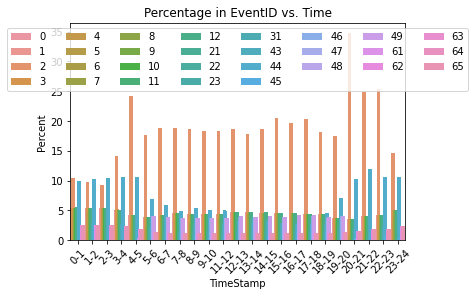

<Figure size 20000x2000 with 0 Axes>

In [30]:
import pandas as pd
import numpy as np
import sklearn as sk
from datetime import datetime, timedelta
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure





#================================================================================================================ 
#Get Columns from Signal Data CSV file
#================================================================================================================

col_list = ["TimeStamp", "DeviceId", "EventId", "Parameter"]
df_spat = pd.read_csv('Signal_events.txt', delimiter = " ")


df_spat["TimeStamp"] = pd.to_datetime(df_spat["TimeStamp"])
time = pd.to_datetime(df_spat["TimeStamp"])
#print (df_spat)

eventid = df_spat['EventId']
parameter = df_spat['Parameter']
new_time = []
for row in range(len(time)):
    
    new_time.append((time[row] - datetime(2021, 1,4)).total_seconds())

#print(new_time)

spat = []

for i in range(len(df_spat)//1000):
    
    spat.append((1000*i, eventid[1000*i], parameter[1000*i]))
    

line_df = pd.DataFrame(data=spat, columns = ["time", "eventid", "parameter"])
#print(line_df)
            

#lineplot = sns.lineplot(data=line_df, x= "time" , y = "eventid", hue = "parameter" )
#plt.yticks(np.arange(0,100, step =5))
#plt.ylim(0,100)

#plt.xlabel("timestamp")
#plt.ylabel("eventId")


#grouped = df_spat.groupby(["Parameter"], sort = True)

#bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]

#labels = ["00:00-02:59","3:00-5:59", "06:00-8:59","9:00-11:59", "12:00-14:59","15:00-17:59", "18:00-20:59", "21:00-23:59"]

bins = [1,2,3,4,5, 6,7, 8,9,10, 11, 12,13, 14,15, 16, 17, 18,19, 20,21,22,23, 24]

labels = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10", "11-12", "12-13"
         , "13-14", "14-15", "15-16", "16-17", "17-18","18-19", "19-20", "20-21", "21-22", "22-23","23-24"]


df_spat["TimeStamp"] = pd.cut(df_spat.TimeStamp.dt.hour, bins, labels = labels, right=False)

x,y = 'TimeStamp', 'EventId'

df_y = df_spat.groupby(x)[y].value_counts(normalize = True)
df_y = df_y.mul(100)
df_y = df_y.rename('Percent').reset_index()


plt.figure(figsize=(100,50))
fig, ax = plt.subplots()

barchart = sns.barplot(x=x, y='Percent', hue=y, data=df_y, ax=ax)
#barchart.ax.set_ylim(0,25)
plt.xticks(rotation=45)
#plt.legend(loc='upper left')
plt.title("Percentage in EventID vs. Time")
figure(figsize=(100, 10), dpi=200)
ax.legend(loc='upper center', fancybox=True, ncol=8)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .25)







plt.show()

            TimeStamp  DeviceId  EventId  Parameter
0 2021-01-04 07:00:05       613        2          2
1 2021-01-04 07:00:05       613        2          6
2 2021-01-04 07:00:05       613        2          7
3 2021-01-04 07:00:05       613       44          3
4 2021-01-04 07:00:05       613       44          8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122151 entries, 0 to 122150
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   TimeStamp  122151 non-null  datetime64[ns]
 1   DeviceId   122151 non-null  int64         
 2   EventId    122151 non-null  int64         
 3   Parameter  122151 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.7 MB
None
       DeviceId        EventId      Parameter
count  122151.0  122151.000000  122151.000000
mean      613.0      20.033663       4.631456
std         0.0      20.813907       2.264205
min       613.0       0.000000       1.00000

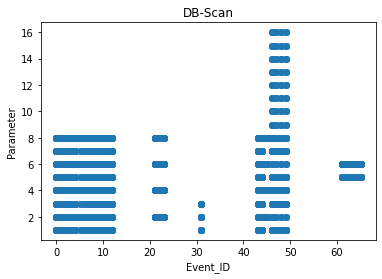

In [ ]:
#DBSCAN Clustering 

import pandas as pd
import numpy as np

import itertools
import sklearn as sk
from datetime import datetime, timedelta
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from scipy.stats import entropy
from sklearn.neighbors import NearestNeighbors
from scipy.optimize import linear_sum_assignment



#================================================================================================================ 
#Get Columns from Signal Data CSV file
#================================================================================================================

col_list = ["TimeStamp", "DeviceId", "EventId", "Parameter"]
df = pd.read_csv('Signal_events.txt', delimiter = " ")


df["TimeStamp"] = pd.to_datetime(df["TimeStamp"])
pd.to_datetime(df["TimeStamp"])

time_series= df['TimeStamp']


#parameter_series = df_spat["Parameter"]

#event_par_df = pd.DataFrame(event_id_series)

print(df.head())

print(df.info())

print(df.describe())

df.drop(columns = ['TimeStamp', 'DeviceId'], axis = 1, inplace=True)

print(df.head(1000))

#X = event_par_df

#db = DBSCAN(eps=4, min_samples=5).fit(X)

#dbs_clustering_labels = db.labels_\


x = df["EventId"]

y = df["Parameter"]

plt.scatter(x,y, cmap='viridis')

plt.xlabel("Event_ID")

plt.ylabel("Parameter")

plt.title("DB-Scan")

plt.show()


df = df[["EventId", "Parameter"]]
df = df.values.astype("float32", copy = False)

stscaler = StandardScaler().fit(df)

df = stscaler.transform(df)

dbsc = DBSCAN(eps = 0.5, min_samples = 15).fit(df)

labels = dbsc.labels_

core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

spat=list(core_samples)

df0 = pd.read_csv('Signal_events.txt', delimiter = " ")

df0.drop(columns = ['TimeStamp', 'DeviceId'], axis = 1, inplace=True)

#add code to randomize df0

df0["spat"]=spat

#sns.lmplot("EventId","Parameter",data=df0,fit_reg=False,hue="spat",height=10)

#plt.show()


            TimeStamp  DeviceId  EventId  Parameter
0 2021-01-04 07:00:05       613        2          2
1 2021-01-04 07:00:05       613        2          6
2 2021-01-04 07:00:05       613        2          7
3 2021-01-04 07:00:05       613       44          3
4 2021-01-04 07:00:05       613       44          8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122151 entries, 0 to 122150
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   TimeStamp  122151 non-null  datetime64[ns]
 1   DeviceId   122151 non-null  int64         
 2   EventId    122151 non-null  int64         
 3   Parameter  122151 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.7 MB
None
       DeviceId        EventId      Parameter
count  122151.0  122151.000000  122151.000000
mean      613.0      20.033663       4.631456
std         0.0      20.813907       2.264205
min       613.0       0.000000       1.00000

Text(0.5, 1.0, 'K-Means Clustering')

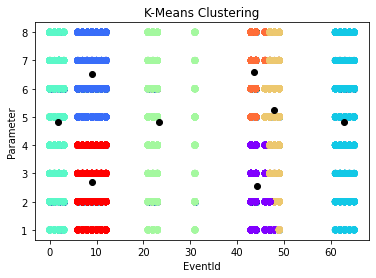

In [122]:
#KMeans Clustering 

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import itertools

#Read from signal file

col_list = ["TimeStamp", "DeviceId", "EventId", "Parameter"]
df = pd.read_csv('Signal_events.txt', delimiter = " ")


df["TimeStamp"] = pd.to_datetime(df["TimeStamp"])
pd.to_datetime(df["TimeStamp"])

time_series= df['TimeStamp']



print(df.head())

print(df.info())

print(df.describe())

df.drop(columns = ['TimeStamp', 'DeviceId'], axis = 1, inplace=True)

df = df.drop(labels=0, axis=0)

#print(df.head(100))

df = df.head(100)

#split for clusters

Xpts = df["EventId"]
Ypts = df["Parameter"]


Points = np.array(list(itertools.product(Xpts, Ypts)))

#append to numpy array

print(Points)


#for item in result:
    #result[0][0] = float(result[0][0])
    #result[1][1] = float(result[1][1])
    



#print(new_arr)

#for tup in result:
    #np.append(new_arr, tup, axis = 0)
    
#print(new_arr)
    

#result_float = [float(x) for x in result]

print(result)



#print(arr)

#for item in result:
    #column_to_be_added = np.array(item)
    #np.hstack((arr, np.atleast_2d(column_to_be_added)))
    
#arr = np.array(result)
    
X = Points

print(X)

                  
plt.scatter(x,y, label='True Position')
#plt.show()


# K MEANS CLUSTERING 

n_clusters = 8
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)



print(kmeans.cluster_centers_)

print(kmeans.labels_)

print("K-Means with # clusters = ")
print(n_clusters)

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')


plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

plt.xlabel("EventId")

plt.ylabel("Parameter")

plt.title("K-Means Clustering")